In [1]:
library(magrittr)
library(tidyverse)
library(Cairo)
library(rasilabRtemplates)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#000000", "#E69F00", "#56B4E9", 
            "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()


### Figure 5B,C,E

In [2]:
data <- read_tsv('../data/plate_reader/5bce_data.tsv')
annotations <- read_csv('../data/plate_reader/5bce_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04)

plot_data <- processed_data %>% 
  # control order of variables
  mutate(medium = factor(medium,
                           levels=c("lysis", "-gly","-ala","+1mM_ala","+.0125%_pyr"))) %>%
  mutate(genotype = factor(genotype, levels=c("WT","del_sdaC"))) %>%
  subset(plasmid == 'none')

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  plasmid = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


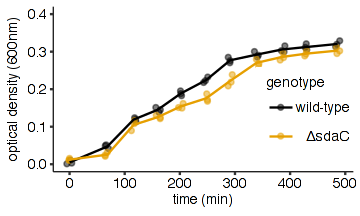

In [3]:
# subset data for Fig 5B
subset = subset(plot_data, medium == '+1mM_ala')

# plot
plot.width = 3
plot.height = 1.8
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.4)) + scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaC")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = c(0.85, 0.35)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_5b.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

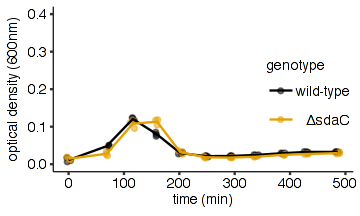

In [4]:
# subset data for Fig 5C
subset = subset(plot_data, medium == '-ala')

# plot
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.4)) + scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaC")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = c(0.85, 0.45)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_5c.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

Warning message:
“Removed 1 rows containing non-finite values (stat_summary).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

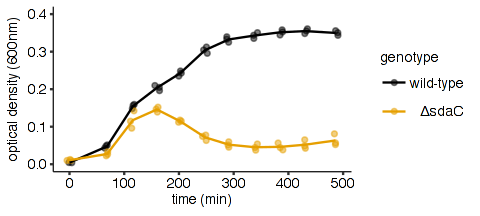

In [5]:
# subset data for Fig 5D
subset = subset(plot_data, medium == '+.0125%_pyr')

# plot
plot.width = 4
plot.height = 1.8
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
ggplot(subset, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.4)) + scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔsdaC")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_5e.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)

### Figure 5D

In [6]:
data <- read_tsv('../data/plate_reader/5d_data.tsv')
annotations <- read_csv('../data/plate_reader/5d_ann.csv')

processed_data <- data %>%  
  left_join(annotations, by = c('plate', 'well')) %>% 
  select(-c(date, strain, well, plate)) %>% 
  mutate(od = od - 0.04) %>%
  subset(genotype %in% c('WT','alaA'))

plot_data <- processed_data %>% 
  mutate(genotype = factor(genotype, levels=c("WT","alaA")))

Parsed with column specification:
cols(
  date = col_date(format = ""),
  plate = col_integer(),
  well = col_character(),
  time = col_double(),
  od = col_double()
)
Parsed with column specification:
cols(
  well = col_character(),
  strain = col_character(),
  genotype = col_character(),
  medium = col_character(),
  replicate = col_integer(),
  plate = col_integer()
)


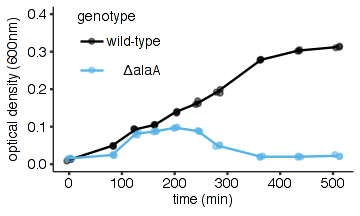

In [7]:
# plot
plot.width = 3
plot.height = 1.8
options(repr.plot.width=plot.width, repr.plot.height=plot.height)
cbPalette <- c("#000000", "#56B4E9")
ggplot(plot_data, aes(x=time, y=od, col=genotype)) +
geom_point(size=1, alpha=0.5, position = position_jitter(w = 5, h = 0)) + 
scale_y_continuous(limits=c(0,0.4)) + scale_color_manual(values=cbPalette, 
                   labels=c("wild-type", expression(italic("ΔalaA")))) + 
labs(x = "time (min)", y = "optical density (600nm)", col = "genotype") +
theme(strip.text=element_text(hjust=0.05), legend.position = c(0.22, 0.75)) +
stat_summary(aes(group=genotype), fun.y=mean, geom="line")

ggsave('../pdf/fig_5d.pdf', width = plot.width, height = plot.height, units = 'in', device=cairo_pdf)